In [40]:
library(rstanarm)
library(ggformula)

Loading required package: ggplot2

Loading required package: ggstance


Attaching package: ‘ggstance’


The following objects are masked from ‘package:ggplot2’:

    geom_errorbarh, GeomErrorbarh


Loading required package: scales

Loading required package: ggridges


New to ggformula?  Try the tutorials: 
	learnr::run_tutorial("introduction", package = "ggformula")
	learnr::run_tutorial("refining", package = "ggformula")



In [ ]:
data_p

In [56]:
download_if_missing <- function(filename, url) {
    if (!file.exists(filename)) {
        dir.create(dirname(filename), showWarnings=FALSE, recursive=TRUE)
        download.file(url, destfile = filename, method="curl")
    }
}

In [59]:
filename <- "./data/ElectionsEconomy/hibbs.dat"

download_if_missing(filename,
                    'https://raw.githubusercontent.com/avehtari/ROS-Examples/master/ElectionsEconomy/data/hibbs.dat')

In [60]:
hibbs <- read.table("./data/ElectionsEconomy/hibbs.dat", header=TRUE)

In [61]:
hibbs

year,growth,vote,inc_party_candidate,other_candidate
<int>,<dbl>,<dbl>,<fct>,<fct>
1952,2.40,44.60,Stevenson,Eisenhower
1956,2.89,57.76,Eisenhower,Stevenson
1960,0.85,49.91,Nixon,Kennedy
1964,4.21,61.34,Johnson,Goldwater
1968,3.02,49.60,Humphrey,Nixon
1972,3.62,61.79,Nixon,McGovern
1976,1.08,48.95,Ford,Carter
1980,-0.39,44.70,Carter,Reagan
1984,3.86,59.17,Reagan,Mondale


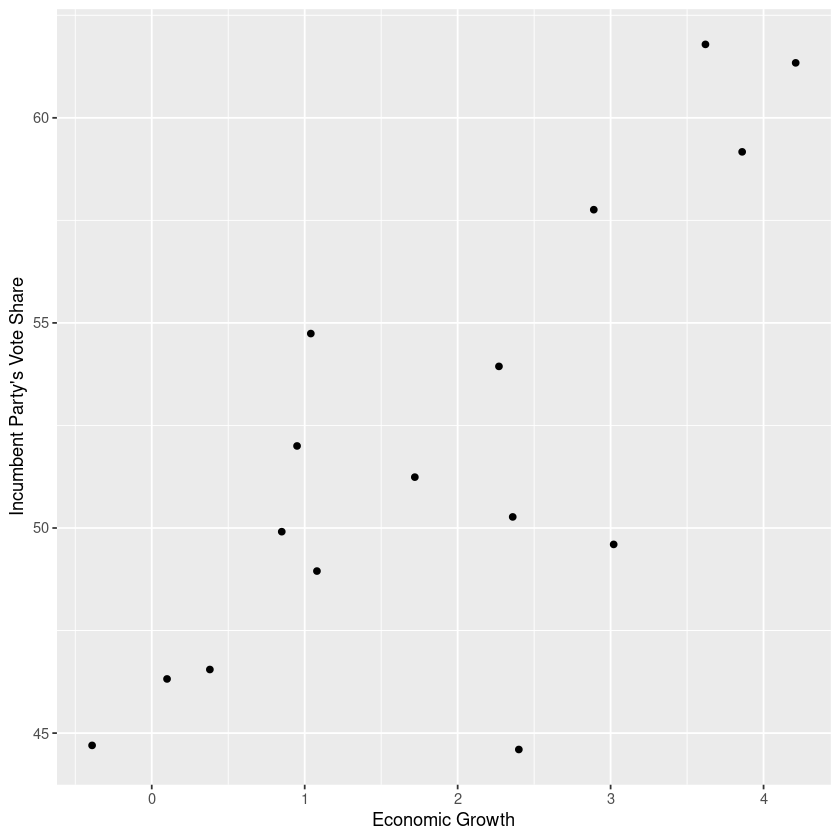

In [82]:
hibbsplot <- hibbs %>% gf_point(vote ~ growth) + xlab('Economic Growth') + ylab("Incumbent Party's Vote Share")
hibbsplot

In [78]:
M1 <- stan_glm(vote ~ growth, data=hibbs)


SAMPLING FOR MODEL 'continuous' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 0.000129 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 1.29 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 0.027713 seconds (Warm-up)
Chain 1:                0.025141 seconds (Sampling)
Chain 1:             

In [80]:
print(M1)

stan_glm
 family:       gaussian [identity]
 formula:      vote ~ growth
 observations: 16
 predictors:   2
------
            Median MAD_SD
(Intercept) 46.3    1.7  
growth       3.1    0.7  

Auxiliary parameter(s):
      Median MAD_SD
sigma 3.8    0.7   

------
* For help interpreting the printed output see ?print.stanreg
* For info on the priors used see ?prior_summary.stanreg


In [86]:
coef(M1)

(Intercept)      growth 
  46.279589    3.060365

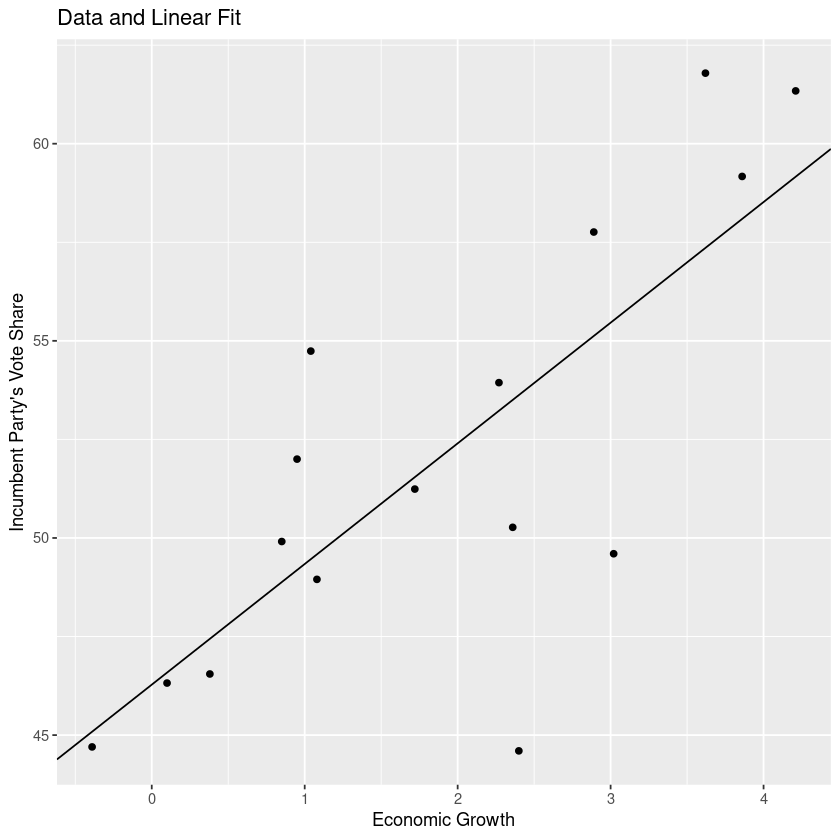

In [96]:
hibbsplot + geom_abline(intercept=coef(M1)[1], slope=coef(M1)[2]) + ggtitle('Data and Linear Fit')